<a href="https://colab.research.google.com/github/GazalaSayyad/Wine-variety-prediction/blob/master/diff_clf_wine_predn_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Libraries and Read Data

In [0]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [0]:
df = pd.read_csv('train.csv')

In [245]:
df.head() # First 5 rows of our dataset

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety
0,NaN,Australia,Andrew Peace 2007 Peace Family Vineyard Chardo...,"Classic Chardonnay aromas of apple, pear and h...",Peace Family Vineyard,83,10.0,Australia Other,South Eastern Australia,NaN,Andrew Peace,Chardonnay
1,@wawinereport,US,North by Northwest 2014 Red (Columbia Valley (...,This wine is near equal parts Syrah and Merlot...,NaN,89,15.0,Washington,Columbia Valley (WA),Columbia Valley,North by Northwest,Red Blend
2,NaN,Italy,Renato Ratti 2007 Conca (Barolo),Barolo Conca opens with inky dark concentratio...,Conca,94,80.0,Piedmont,Barolo,NaN,Renato Ratti,Nebbiolo
3,@vossroger,France,Domaine l'Ancienne Cure 2010 L'Abbaye White (B...,It's impressive what a small addition of Sauvi...,L'Abbaye,87,22.0,Southwest France,Bergerac Sec,NaN,Domaine l'Ancienne Cure,Bordeaux-style White Blend
4,@vossroger,France,Château du Cèdre 2012 Le Cèdre Vintage Malbec ...,"This ripe, sweet wine is rich and full of drie...",Le Cèdre Vintage,88,33.0,France Other,Vin de Liqueur,NaN,Château du Cèdre,Malbec


In [246]:
df.drop(["user_name"], axis=1)

,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety
0,Australia,Andrew Peace 2007 Peace Family Vineyard Chardo...,"Classic Chardonnay aromas of apple, pear and h...",Peace Family Vineyard,83,10.0,Australia Other,South Eastern Australia,NaN,Andrew Peace,Chardonnay
1,US,North by Northwest 2014 Red (Columbia Valley (...,This wine is near equal parts Syrah and Merlot...,NaN,89,15.0,Washington,Columbia Valley (WA),Columbia Valley,North by Northwest,Red Blend
2,Italy,Renato Ratti 2007 Conca (Barolo),Barolo Conca opens with inky dark concentratio...,Conca,94,80.0,Piedmont,Barolo,NaN,Renato Ratti,Nebbiolo
3,France,Domaine l'Ancienne Cure 2010 L'Abbaye White (B...,It's impressive what a small addition of Sauvi...,L'Abbaye,87,22.0,Southwest France,Bergerac Sec,NaN,Domaine l'Ancienne Cure,Bordeaux-style White Blend
4,France,Château du Cèdre 2012 Le Cèdre Vintage Malbec ...,"This ripe, sweet wine is rich and full of drie...",Le Cèdre Vintage,88,33.0,France Other,Vin de Liqueur,NaN,Château du Cèdre,Malbec
...,...,...,...,...,...,...,...,...,...,...,...
82652,Spain,Montecillo 2007 Crianza (Rioja),"Hot earth, baked cherry and mild vanilla aroma...",Crianza,84,12.0,Northern Spain,Rioja,NaN,Montecillo,Tempranillo
82653,US,Vivác Winery 2008 Single Vineyard Cabernet Sau...,"Pungent, high-pitched notes of turmeric and dr...",Single Vineyard,85,21.0,New Mexico,New Mexico,NaN,Vivác Winery,Cabernet Sauvignon
82654,France,Domaine de la Madone 2014 Nouveau (Beaujolais...,This is a wine that's not just lively and frui...,Nouveau,87,14.0,Beaujolais,Beaujolais-Villages,NaN,Domaine de la Madone,Gamay
82655,France,Château Beaumont 2011 Haut-Médoc,"An impressive wine, it already shows signs of ...",NaN,91,20.0,Bordeaux,Haut-Médoc,NaN,Château Beaumont,Bordeaux-style Red Blend


 Visualization of Data

Number of Wine Tasted According To Countries (Top 10)

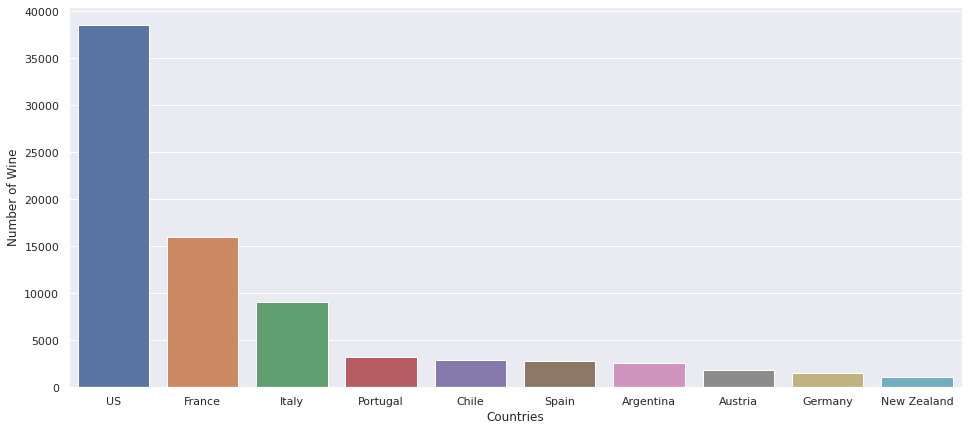

In [247]:
plt.figure(figsize=(16,7))
sns.set(style="darkgrid")
sns.barplot(x=df.country.value_counts()[:10].index, y=df.country.value_counts()[:10].values)
plt.xlabel("Countries")
plt.ylabel("Number of Wine")
plt.show()

Average Points (Top 10)

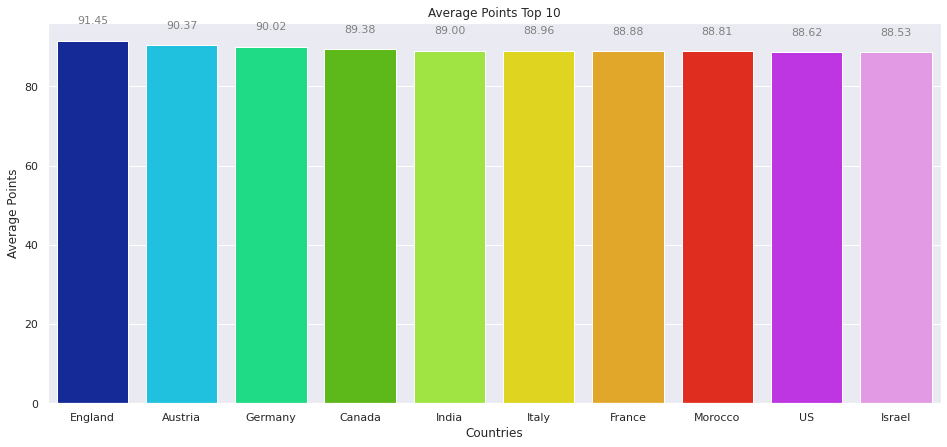

In [248]:
plt.figure(figsize=(16,7))
g = sns.barplot(x=df.groupby("country").mean().sort_values(by="points",ascending=False).points.index[:10], y=df.groupby("country").mean().sort_values(by="points",ascending=False).points.values[:10], palette="gist_ncar")
plt.xlabel("Countries")
plt.ylabel("Average Points")
plt.title("Average Points Top 10")
ax=g
for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='gray', xytext=(0, 20),
                 textcoords='offset points')
plt.show()

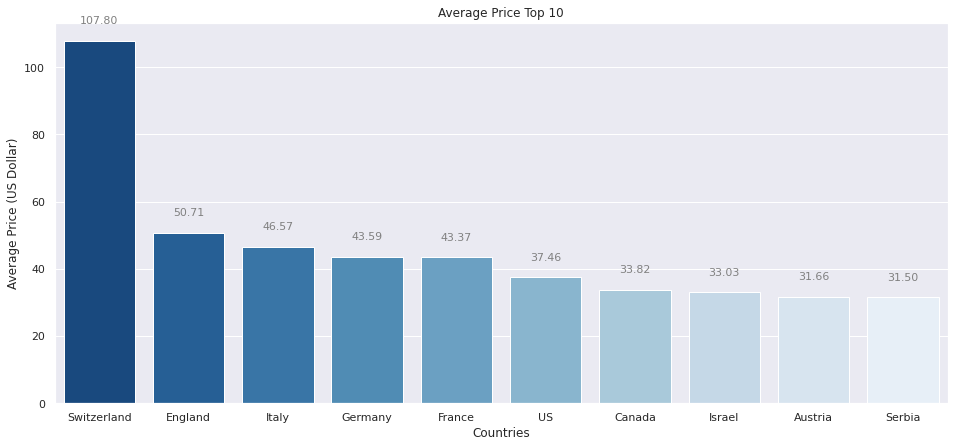

In [249]:
plt.figure(figsize=(16,7))
g = sns.barplot(x=df.groupby("country").mean().sort_values(by="price",ascending=False).price.index[:10], y=df.groupby("country").mean().sort_values(by="price",ascending=False).price.values[:10], palette="Blues_r")
plt.xlabel("Countries")
plt.ylabel("Average Price (US Dollar)")
plt.title("Average Price Top 10")
ax=g
for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='gray', xytext=(0, 20),
                 textcoords='offset points')
plt.show()

Points / Price Ratio (Top 10)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



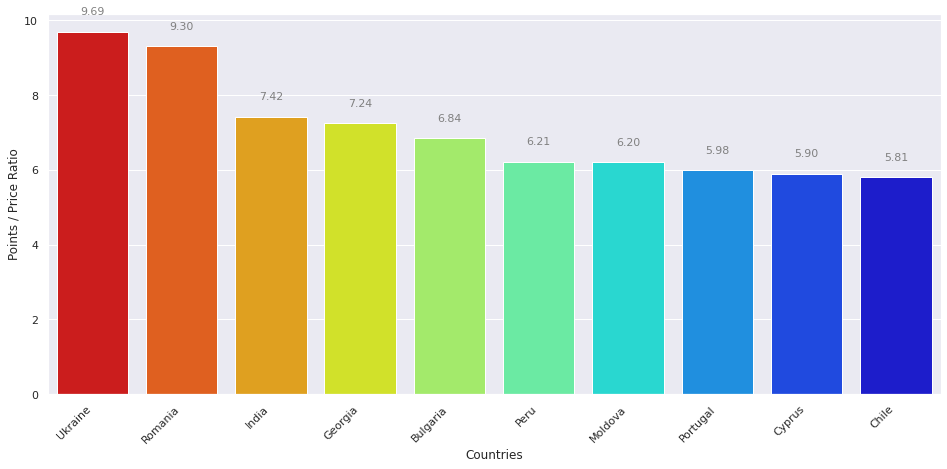

In [250]:
df2 = df[np.isfinite(df["price"])]
df2["points/price"] = df2.points / df2.price
df2.groupby("country").mean().sort_values(by="points/price", ascending=False)
plt.figure(figsize=(16,7))
g = sns.barplot(x=df2.groupby("country").mean().sort_values(by="points/price", ascending=False)["points/price"].index[:10], y=df2.groupby("country").mean().sort_values(by="points/price", ascending=False)["points/price"].values[:10], palette="jet_r")
plt.xlabel("Countries")
plt.xticks(rotation= 45, ha="right")
plt.ylabel("Points / Price Ratio")
ax=g
for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='gray', xytext=(0, 20),
                 textcoords='offset points')
plt.show()

Best Wines According to Points (Top 20)

In [251]:
top20Points = df.sort_values(by="points", ascending=False).head(20)
for i in range(20):
    print(" {} / {} / $ {}".format( top20Points.country.values[i], top20Points.province.values[i], top20Points.price.values[i]))
    print("-----------------------------------------------------------------------------------------------------------------------")

 US / California / $ 200.0
-----------------------------------------------------------------------------------------------------------------------
 France / Bordeaux / $ 848.0
-----------------------------------------------------------------------------------------------------------------------
 France / Champagne / $ 617.0
-----------------------------------------------------------------------------------------------------------------------
 Portugal / Douro / $ 450.0
-----------------------------------------------------------------------------------------------------------------------
 Italy / Tuscany / $ 460.0
-----------------------------------------------------------------------------------------------------------------------
 France / Bordeaux / $ 150.0
-----------------------------------------------------------------------------------------------------------------------
 France / Bordeaux / $ 1500.0
--------------------------------------------------------------------------------

In [252]:
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
labels = top20Points.country.value_counts().index
values = top20Points.country.value_counts().values
trace = go.Pie(labels=labels, values=values)
iplot([trace])

The Type of Grapes Used to Make The Wine (Top 10)

In [253]:
df.variety.value_counts()
fig = {
  "data": [
    {
      "values": df.variety.value_counts().values[:10],
      "labels": df.variety.value_counts().index[:10],
      "name": "Variaty",
      "hoverinfo":"label+percent+name",
      "hole": .4,
      "type": "pie"
    },
    ],
  "layout": {
        "title":"Variaty",
        "annotations": [
            {
                "font": {
                    "size": 20
                },
                "showarrow": False,
                "text": "Grapes",
                "x": 0.5,
                "y": 0.5
            },
        ]
    }
}
iplot(fig)

look at a WordCloud of the description Text

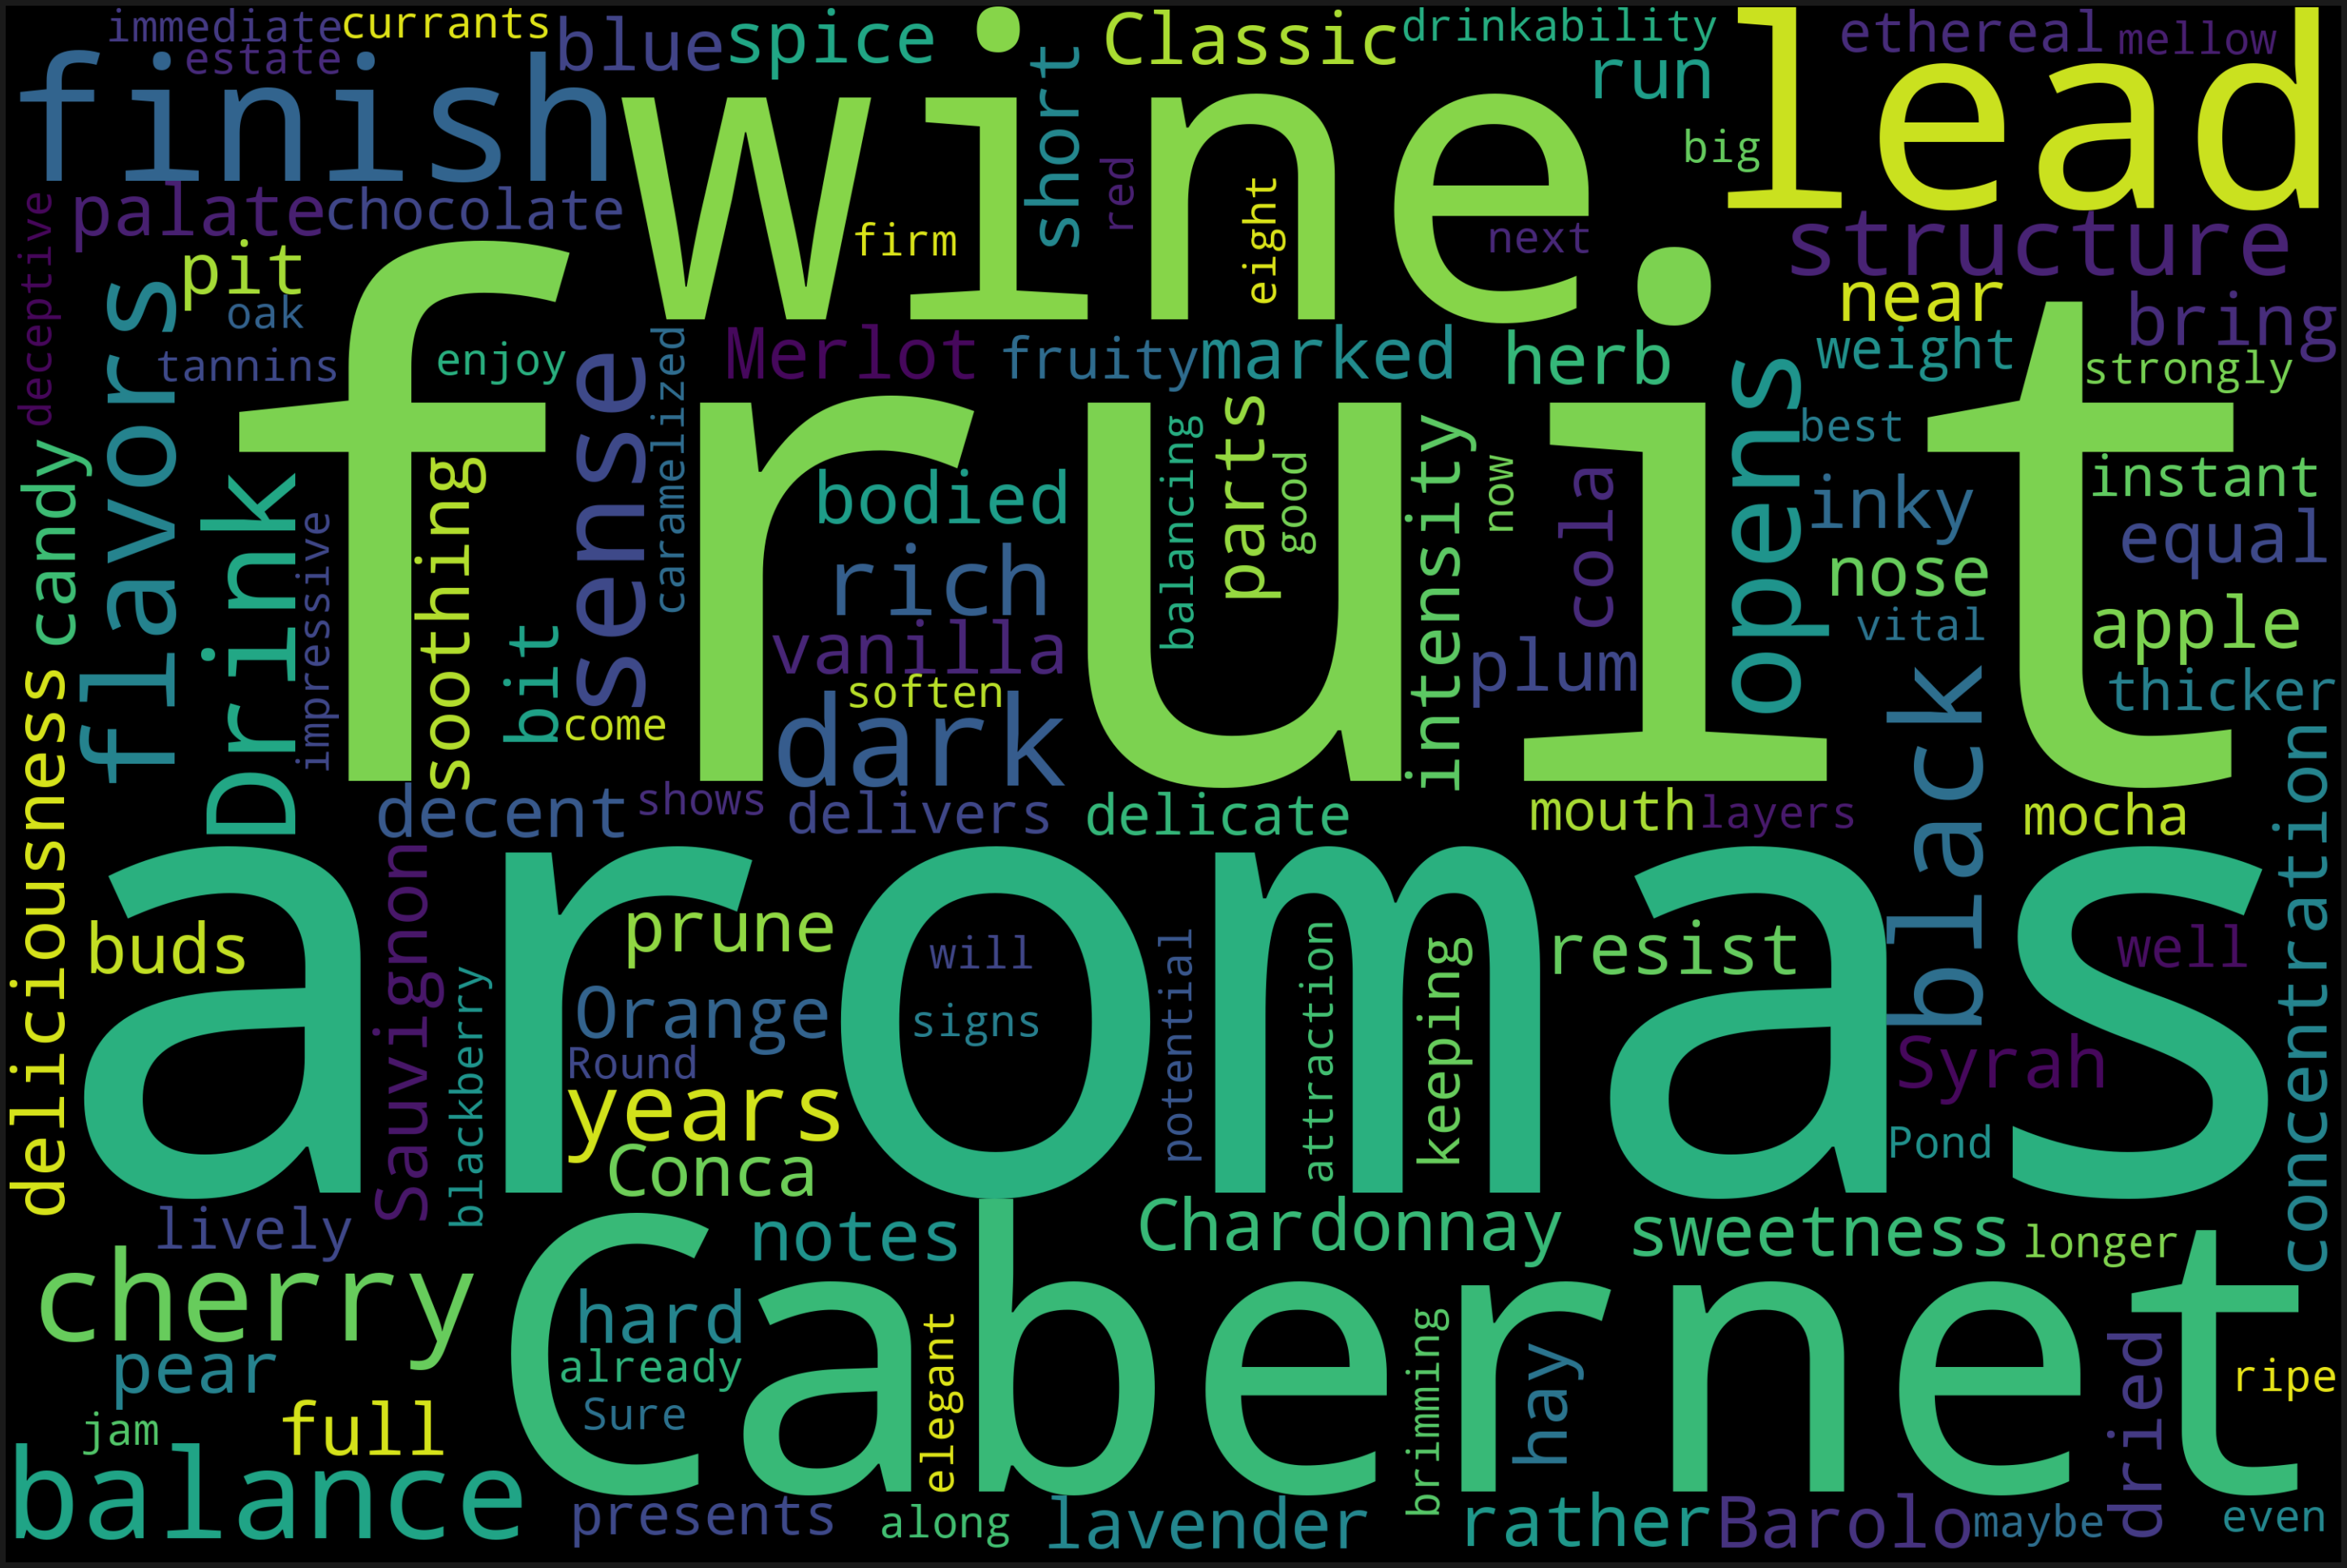

In [254]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
text = df.review_description.values
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

Create quality column from points values to classes of bad, ok, good, and great. Below is a function to return string quality based on the points value.

In [0]:
def getQuality(points):
    if(points <= 85):
        return 'bad'
    elif(points<=90 ):
        return 'ok'
    elif(points<=95):
        return 'good'
    elif(points<=100):
        return 'great'
    else:
        return 'If this gets hit, we did something wrong!'

In [0]:
df['quality'] = df['points'].apply(getQuality)

Visualize the new column against the price column


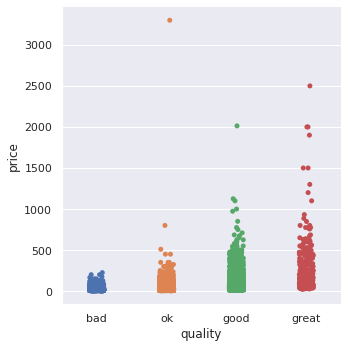

In [258]:
sns.catplot(x = 'quality', y = 'price', data = df)

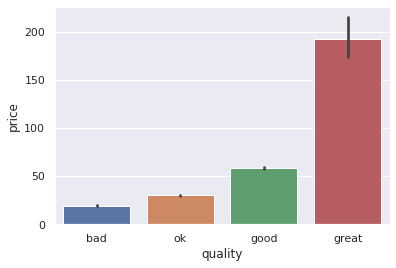

In [259]:
sns.barplot(x = 'quality', y = 'price', data = df)

Create priceRange column

In [0]:
def getPriceRange(price):
    if(price <= 30):
        return '1-30'
    elif(price<=50):
        return '31-50'
    elif(price<=100): 
        return '51-100'
    elif(math.isnan(price)):
        return '0'
    else:
        return 'Above 100'

In [0]:
import math
df['priceRange'] = df['price'].apply(getPriceRange)

In [262]:
df['variety'].unique()

array(['Chardonnay', 'Red Blend', 'Nebbiolo',
       'Bordeaux-style White Blend', 'Malbec', 'Cabernet Sauvignon',
       'Zinfandel', 'Pinot Noir', 'Sauvignon Blanc', 'Gamay',
       'Grüner Veltliner', 'Bordeaux-style Red Blend', 'Sangiovese',
       'Syrah', 'White Blend', 'Cabernet Franc', 'Portuguese Red',
       'Portuguese White', 'Rhône-style Red Blend', 'Rosé',
       'Champagne Blend', 'Merlot', 'Riesling', 'Sparkling Blend',
       'Pinot Grigio', 'Tempranillo', 'Pinot Gris', 'Gewürztraminer'],
      dtype=object)

In [263]:
df.groupby(df['variety']).size()

variety
Bordeaux-style Red Blend       5497
Bordeaux-style White Blend      850
Cabernet Franc                 1095
Cabernet Sauvignon             7552
Champagne Blend                1133
Chardonnay                     9403
Gamay                           816
Gewürztraminer                  840
Grüner Veltliner               1055
Malbec                         2119
Merlot                         2471
Nebbiolo                       2242
Pinot Grigio                    873
Pinot Gris                     1148
Pinot Noir                    10587
Portuguese Red                 1969
Portuguese White                896
Red Blend                      7166
Rhône-style Red Blend          1182
Riesling                       4148
Rosé                           2831
Sangiovese                     2165
Sauvignon Blanc                4011
Sparkling Blend                1739
Syrah                          3316
Tempranillo                    1448
White Blend                    1896
Zinfandel           

Create a Bag-of-Words using the CountVectorizer functionality

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
def get_vector_feature_matrix(description):
    vectorizer = CountVectorizer(lowercase=True, stop_words="english", max_features=5)
    #vectorizer = CountVectorizer(lowercase=True, stop_words="english", max_features=4000)
    #vectorizer = CountVectorizer(lowercase=True, stop_words="english",ngram_range=(1, 2), max_features=5000)
    #vectorizer = CountVectorizer(lowercase=True, stop_words="english", tokenizer=stemming_tokenizer) 
    vector = vectorizer.fit_transform(np.array(description))
    return vector, vectorizer

In [0]:
vector, vectorizer = get_vector_feature_matrix(df['review_description'])

In [266]:
print(vectorizer)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=5, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)


In [267]:
print(vectorizer.get_feature_names())

['aromas', 'flavors', 'fruit', 'palate', 'wine']


Print out our first description and first vector to see this represented.

In [268]:
print(vector.toarray()[0])

[1 0 0 1 0]


In [269]:
df['review_description'].iloc[0]

'Classic Chardonnay aromas of apple, pear and hay lead into a palate marked by decent intensity but also a bit of sweetness. Orange and candy notes run through the rather short finish.'

In [270]:
print(vectorizer.vocabulary_)

{'aromas': 0, 'palate': 3, 'wine': 4, 'fruit': 2, 'flavors': 1}


In [271]:
x = vectorizer.transform(np.array([df['review_description'].iloc[0]]))
print(x)

  (0, 0)	1
  (0, 3)	1


In [272]:
print(len(vectorizer.vocabulary_))

5


Train the model

In [0]:
def get_vector_feature_matrix(description):
    #vectorizer = CountVectorizer(lowercase=True, stop_words="english", max_features=5)
    vectorizer = CountVectorizer(lowercase=True, stop_words="english", max_features=1000)
    #vectorizer = CountVectorizer(lowercase=True, stop_words="english",ngram_range=(1, 2), max_features=3000)
    #vectorizer = CountVectorizer(lowercase=True, stop_words="english", tokenizer=stemming_tokenizer) 
    vector = vectorizer.fit_transform(np.array(description))
    return vector, vectorizer

In [0]:
vector, vectorizer = get_vector_feature_matrix(df['review_description'])

In [0]:
features = vector.todense()

In [0]:
label = df['variety']
#label = df['quality'] 
#label = df['priceRange']

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.linear_model import LogisticRegression
X, y = features, label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [278]:
lr = LogisticRegression(multi_class='ovr',solver='lbfgs')
model = lr.fit(X_train, y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.6/dist-packages/sklearn/lin

In [279]:
accuracy = model.score(X_test, y_test)
print ("Accuracy is {}".format(accuracy))

Accuracy is 0.670759738688604


Test model using Test dataset

In [280]:
test = pd.read_csv('test.csv')
test.head()

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery
0,@paulgwine,US,Boedecker Cellars 2011 Athena Pinot Noir (Will...,Nicely differentiated from the companion Stewa...,Athena,88,35.0,Oregon,Willamette Valley,Willamette Valley,Boedecker Cellars
1,@wineschach,Argentina,Mendoza Vineyards 2012 Gran Reserva by Richard...,"Charred, smoky, herbal aromas of blackberry tr...",Gran Reserva by Richard Bonvin,90,60.0,Mendoza Province,Mendoza,NaN,Mendoza Vineyards
2,@vboone,US,Prime 2013 Chardonnay (Coombsville),"Slightly sour and funky in earth, this is a re...",NaN,87,38.0,California,Coombsville,Napa,Prime
3,@wineschach,Argentina,Bodega Cuarto Dominio 2012 Chento Vineyard Sel...,"This concentrated, midnight-black Malbec deliv...",Chento Vineyard Selection,91,20.0,Mendoza Province,Mendoza,NaN,Bodega Cuarto Dominio
4,@kerinokeefe,Italy,SassodiSole 2012 Brunello di Montalcino,"Earthy aromas suggesting grilled porcini, leat...",NaN,90,49.0,Tuscany,Brunello di Montalcino,NaN,SassodiSole


In [281]:
x = vectorizer.transform(np.array([test['review_description'].iloc[3]]))
#x = vectorizer.transform(np.array([test]))
proba = model.predict_proba(x)
classes = model.classes_
resultdf = pd.DataFrame(data=proba, columns=classes)
resultdf

,Bordeaux-style Red Blend,Bordeaux-style White Blend,Cabernet Franc,Cabernet Sauvignon,Champagne Blend,Chardonnay,Gamay,Gewürztraminer,Grüner Veltliner,Malbec,Merlot,Nebbiolo,Pinot Grigio,Pinot Gris,Pinot Noir,Portuguese Red,Portuguese White,Red Blend,Rhône-style Red Blend,Riesling,Rosé,Sangiovese,Sauvignon Blanc,Sparkling Blend,Syrah,Tempranillo,White Blend,Zinfandel
0,0.014546,2.110969e-08,0.000925,0.022752,8.397022e-09,2.539756e-12,0.000023,1.648243e-07,1.174875e-07,0.778873,0.000484,0.000201,7.558962e-08,2.836875e-07,0.000011,0.000006,3.683554e-09,0.180763,0.000044,7.712449e-08,5.515247e-07,0.000341,1.287465e-08,9.181160e-08,0.000829,0.000164,9.461359e-08,0.000036


In [282]:
topPrediction = resultdf.T.sort_values(by=[0], ascending = [False])
topPrediction.head()

,0
Malbec,0.778873
Red Blend,0.180763
Cabernet Sauvignon,0.022752
Bordeaux-style Red Blend,0.014546
Cabernet Franc,0.000925


In [283]:
varitey = lr.predict(x)
varitey

array(['Malbec'], dtype=object)

Naive Bayes

In [284]:
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer

df = pd.read_csv('train.csv')

counter = Counter(df['variety'].tolist())
top_10_varieties = {i[0]: idx for idx, i in enumerate(counter.most_common(10))}
df = df[df['variety'].map(lambda x: x in top_10_varieties)]

description_list = df['review_description'].tolist()
varietal_list = [top_10_varieties[i] for i in df['variety'].tolist()]
varietal_list = np.array(varietal_list)

count_vect = CountVectorizer()
x_train_counts = count_vect.fit_transform(description_list)


tfidf_transformer = TfidfTransformer()
x_train_tfidf = tfidf_transformer.fit_transform(x_train_counts)

train_x, test_x, train_y, test_y = train_test_split(x_train_tfidf, varietal_list, test_size=0.3)

clf = MultinomialNB().fit(train_x, train_y)
y_score = clf.predict(test_x)

n_right = 0
for i in range(len(y_score)):
    if y_score[i] == test_y[i]:
        n_right += 1

print("Accuracy: %.2f%%" % ((n_right/float(len(test_y)) * 100)))

Accuracy: 62.36%


Support vector machine

In [285]:
clf = SVC(kernel='linear').fit(train_x, train_y)
y_score = clf.predict(test_x)

n_right = 0
for i in range(len(y_score)):
    if y_score[i] == test_y[i]:
        n_right += 1

print("Accuracy: %.2f%%" % ((n_right/float(len(test_y)) * 100)))

Accuracy: 80.17%


The accuracy for Logistic Regression, Naive Bayes and SVC were  67.07%, 62.36% and  80.17% respectively.